**🚕 Automatidata — Course 6 Portfolio Project**


**Project Summary:**  
This portfolio project presents the process of building a machine learning model that predicts whether a customer would tip generously or not based on important features such as time aspects and ride details.


**Table of Contents:**

1- Import Required Libraries & load the Dataset

2- Data Preparation & Feature engineering

3- Modeling & Evaluation
  

4- Feature importance

5- Conclusions


---

What could be the ethical implications of this model? What are the consequences of the model making errors?
- The effect of a false positive (the model says a customer will give a tip, but they actually won't) is much greater than the effect of a false negative (when the model says a customer will not give a tip, but they actually will) because in the case of a false positive, the driver would be frustrated if he expected the customer will tip him but in fact they didn't, the ethical implications of such a situation can include that the driver gives the customer a bad review and the fact that the driver would be in a bad temper can actually affect how he behaves in the next ride.

If we were to modify the modeling objective so, instead of predicting people who won't tip at all, we predict people who are particularly generous&mdash;those who will tip 20% or more?

What features do we need to make this prediction?
- Most importantly the tip amount percentage calculated from the tip amount and total amount and a generous column based on the calculated tip percent.

What would be the target variable?  
- A binary outcome (generous, not generous)


What metric should we use to evaluate the model? Do we have enough information to decide this now?
- If the target variable is balanced, we're more likely to use accuracy.


**1- Import Required Libraries & load the Dataset**

In [1]:
# Import packages and libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Use this function to plot feature importance
from xgboost import plot_importance

In [2]:
#This line is only run if we want to import data from google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Use this option to display all columns
pd.set_option('display.max_columns', None)

In [4]:
# Load dataset into dataframe
df0 = pd.read_csv('/content/drive/MyDrive/Data & Research 📉/Courses/Google Advanced Analytics Certificate/6- Machine Learning/Project/Code/2017_Yellow_Taxi_Trip_Data.csv')

# Import predicted fares and mean distance and duration from previous course
nyc_preds_means = pd.read_csv('/content/drive/MyDrive/Data & Research 📉/Courses/Google Advanced Analytics Certificate/6- Machine Learning/Project/Code/nyc_preds_means.csv')

In [5]:
# Check the first 5 rows from df0
df0.head(5)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80


In [6]:
# Check the first few rows of `nyc_preds_means`
nyc_preds_means.head(5)

,mean_duration,mean_distance,predicted_fare
0,22.847222,3.521667,16.434245
1,24.470370,3.108889,16.052218
2,7.250000,0.881429,7.053706
3,30.250000,3.700000,18.731650
4,14.616667,4.435000,15.845642


Join the two dataframes



In [7]:
# Merge datasets
df = df0.merge(nyc_preds_means, left_index=True, right_index=True)

df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,mean_duration,mean_distance,predicted_fare
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,22.847222,3.521667,16.434245
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,24.470370,3.108889,16.052218
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,7.250000,0.881429,7.053706
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,30.250000,3.700000,18.731650
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,14.616667,4.435000,15.845642


**2- Data Preparation & Feature engineering**

In [8]:
# Check the columns datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

In [9]:
# Subset the data to isolate only customers who paid by credit card because customers who pay in cash pay an average of $0 in tips
df1 = df[df['payment_type']==1].copy()

In [10]:
# Create a tip % col from the tip amount and total amount
df1['tip_percent'] = round(df1['tip_amount'] / (df1['total_amount'] - df1['tip_amount']),3)
df1.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,mean_duration,mean_distance,predicted_fare,tip_percent
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,22.847222,3.521667,16.434245,0.200
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,24.470370,3.108889,16.052218,0.238
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,7.250000,0.881429,7.053706,0.199
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,30.250000,3.700000,18.731650,0.300
5,23345809,2,03/25/2017 8:34:11 PM,03/25/2017 8:42:11 PM,6,2.30,1,N,161,236,1,9.0,0.5,0.5,2.06,0.0,0.3,12.36,11.855376,2.052258,10.441351,0.200


We'll create a column called `generous`which will be the target variable. The column should be a binary indicator of whether or not a customer tipped ≥ 20% (1=yes, 0=no).

1. Begin by making the `generous` column a copy of the `tip_percent` column.
2. Reassign the column by converting it to Boolean (True/False).
3. Reassign the column by converting Boolean to binary (1/0).

In [11]:
# Create a copy of the tip percent column
df1['generous'] = df1['tip_percent']

# Convert the column into Boolean
df1['generous'] = (df1['generous'] >= 0.2)

#Convert the column datatype to binary
df1['generous'] = df1['generous'].astype(int)

Create day column

In [12]:
# Convert pickup and dropoff cols to datetime
df1['tpep_pickup_datetime'] = pd.to_datetime(df1['tpep_pickup_datetime'], format='%m/%d/%Y %I:%M:%S %p')
df1['tpep_dropoff_datetime'] = pd.to_datetime(df1['tpep_dropoff_datetime'], format='%m/%d/%Y %I:%M:%S %p')

In [13]:
# Create a 'day' column from the pickup column
df1['day']= df1['tpep_pickup_datetime'].dt.day_name()
df1['day']= df1['day'].str.lower()
df1.head(3)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,mean_duration,mean_distance,predicted_fare,tip_percent,generous,day
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,22.847222,3.521667,16.434245,0.200,1,saturday
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,24.470370,3.108889,16.052218,0.238,1,tuesday
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,7.250000,0.881429,7.053706,0.199,0,friday


Create time of day columns

Create four new columns that represent time of day bins. Each column should contain binary values (0=no, 1=yes) that indicate whether a trip began (picked up) during the following times:

`am_rush` = [06:00&ndash;10:00)  
`daytime` = [10:00&ndash;16:00)  
`pm_rush` = [16:00&ndash;20:00)  
`nighttime` = [20:00&ndash;06:00)  

In [14]:
# Create 'am_rush' column
df1['am_rush'] = df1['tpep_pickup_datetime'].dt.hour

# Create 'daytime' column
df1['daytime'] = df1['tpep_pickup_datetime'].dt.hour

# Create 'pm_rush' column
df1['pm_rush'] = df1['tpep_pickup_datetime'].dt.hour

# Create 'nighttime' column
df1['nighttime'] = df1['tpep_pickup_datetime'].dt.hour

df1.head(3)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,mean_duration,mean_distance,predicted_fare,tip_percent,generous,day,am_rush,daytime,pm_rush,nighttime
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,22.847222,3.521667,16.434245,0.200,1,saturday,8,8,8,8
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,24.470370,3.108889,16.052218,0.238,1,tuesday,14,14,14,14
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,7.250000,0.881429,7.053706,0.199,0,friday,7,7,7,7


Write four functions to convert each new column to binary (0/1).

In [15]:
# Define 'am_rush()' conversion function [06:00–10:00)
def am_rush(hour):

  '''A function that returns a value of 1 if the time is
  between 6-10 and 0 otherwise '''

  if 6 <= hour['am_rush'] < 10:
        val = 1
  else:
        val = 0

  return val

In [16]:
# Apply the 'am_rush' function to the 'am_rush' series
df1['am_rush']= df1.apply(am_rush, axis=1)
df1.head(3)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,mean_duration,mean_distance,predicted_fare,tip_percent,generous,day,am_rush,daytime,pm_rush,nighttime
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,22.847222,3.521667,16.434245,0.200,1,saturday,1,8,8,8
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,24.470370,3.108889,16.052218,0.238,1,tuesday,0,14,14,14
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,7.250000,0.881429,7.053706,0.199,0,friday,1,7,7,7


In [ ]:
# Define 'daytime()' conversion function [10:00–16:00)
def day_time(hour):
    if 10 <=hour['daytime'] < 16:
        val= 1
    else:
        val=0

    return val

In [ ]:
# Apply 'daytime()' function to the 'daytime' series
df1['daytime']= df1.apply(day_time, axis=1)

In [17]:
# Define 'pm_rush()' conversion function [16:00–20:00)
def pm_rush(hour):
  '''A function that returns a value of 1 if the time is
  between 16-20 and 0 otherwise '''

  if 16 <= hour['pm_rush'] < 20:
        val=1
  else:
        val=0

  return val

In [18]:
# Apply the 'pm_rush()' function to the 'pm_rush' series
df1['pm_rush']= df1.apply(pm_rush, axis=1)

In [19]:
# Define 'nighttime()' conversion function [20:00–06:00)
def nighttime(hour):
  '''A function that returns a value of 1 if the time is
  between 20-6 and 0 otherwise '''

  if 20 <= hour['nighttime'] < 24:
        val = 1
  elif 0 <= hour['nighttime'] < 6:
        val = 1
  else:
        val = 0

  return val

In [20]:
# Apply the 'nighttime' function to the 'nighttime' series
df1['nighttime'] = df1.apply(nighttime, axis=1)

Create `month` column

In [21]:
# Create 'month' column from the pickup column
df1['month']= df1['tpep_pickup_datetime'].dt.strftime('%b').str.lower()

In [22]:
# Check the newly created column
df1.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,mean_duration,mean_distance,predicted_fare,tip_percent,generous,day,am_rush,daytime,pm_rush,nighttime,month
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,22.847222,3.521667,16.434245,0.200,1,saturday,1,8,0,0,mar
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,24.470370,3.108889,16.052218,0.238,1,tuesday,0,14,0,0,apr
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,7.250000,0.881429,7.053706,0.199,0,friday,1,7,0,0,dec
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,30.250000,3.700000,18.731650,0.300,1,sunday,0,13,0,0,may
5,23345809,2,2017-03-25 20:34:11,2017-03-25 20:42:11,6,2.30,1,N,161,236,1,9.0,0.5,0.5,2.06,0.0,0.3,12.36,11.855376,2.052258,10.441351,0.200,1,saturday,0,20,0,1,mar


In [23]:
# Drop irrelevant columns that either won't be useful for predicting the target variable or will be available only when the ride is completed
drop_cols = ['Unnamed: 0', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
             'payment_type', 'trip_distance', 'store_and_fwd_flag', 'payment_type',
             'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
             'improvement_surcharge', 'total_amount', 'tip_percent']

df1 = df1.drop(drop_cols, axis=1)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15265 entries, 0 to 22698
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   VendorID         15265 non-null  int64  
 1   passenger_count  15265 non-null  int64  
 2   RatecodeID       15265 non-null  int64  
 3   PULocationID     15265 non-null  int64  
 4   DOLocationID     15265 non-null  int64  
 5   mean_duration    15265 non-null  float64
 6   mean_distance    15265 non-null  float64
 7   predicted_fare   15265 non-null  float64
 8   generous         15265 non-null  int64  
 9   day              15265 non-null  object 
 10  am_rush          15265 non-null  int64  
 11  daytime          15265 non-null  int32  
 12  pm_rush          15265 non-null  int64  
 13  nighttime        15265 non-null  int64  
 14  month            15265 non-null  object 
dtypes: float64(3), int32(1), int64(9), object(2)
memory usage: 1.8+ MB


Variable encoding

For the model to work properly, we need to change categorical columns to numerical ones which can be done using the get_dummies() function.

There're categorical columns however that are stored as numeric such as RatecodeID so we need to change these columns first to strings so that the dummying process is performed

In [24]:
# 1. Define list of cols to convert to string
cols_to_str= ['RatecodeID', 'PULocationID', 'DOLocationID']

# 2. Convert each column to string
for col in cols_to_str:
    df1[col]= df1[col].astype('str')

In [25]:
# Convert categorical columns to numeric (binary)
df2= pd.get_dummies(df1, drop_first=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15265 entries, 0 to 22698
Columns: 347 entries, VendorID to month_sep
dtypes: bool(337), float64(3), int32(1), int64(6)
memory usage: 6.1 MB


Choose a proper evaluation metric

In [26]:
# Check the class balance of the 'generous' column
df2['generous'].value_counts()

,count
generous,
1,8035
0,7230


The dataset is almost balanced so accuracy would be a good measure. It's better though to check the effect of errors on the business context to see what other metric can complete the picture.

If the model makes type I error or false positive (the model predicts a tip ≥ 20%, but the customer does not give one), this would disappoint the driver perhaps affecting the driver's attitude in the next ride.

If the model makes type II error however, the error would be more costly for customers because a request from a generous customer could be refused from the driver if the model predicts that the customer won't tip generously causing frustration to generous customers.

Since both errors are costly in the business context, it's better to use a metric that accounts for both precision and recall, that's why F1 score would be an excellent choice.

**3- Modeling & Evaluation**

Split the data into train & test

In [27]:
# Isolate target variable (y)
y= df2['generous']

# Isolate the features (X)
X= df2.drop('generous', axis=1)

# Split into train and test sets
X_train, X_test, y_train, y_test= train_test_split(X,y, stratify=y, test_size=0.2, random_state=42)

**Random forest**

Begin with using `GridSearchCV` to tune a random forest model.

1. Instantiate the random forest classifier `rf` and set the random state.

2. Create a dictionary `cv_params` of any of the following hyperparameters and their corresponding values to tune. The more you tune, the better your model will fit the data, but the longer it will take.
 - `max_depth`  
 - `max_features`  
 - `max_samples`
 - `min_samples_leaf`  
 - `min_samples_split`
 - `n_estimators`  

3. Define a set `scoring` of scoring metrics for GridSearch to capture (precision, recall, F1 score, and accuracy).

4. Instantiate the `GridSearchCV` object `rf1`. Pass to it as arguments:
 - estimator=`rf`
 - param_grid=`cv_params`
 - scoring=`scoring`
 - cv: define the number of you cross-validation folds you want (`cv=_`)
 - refit: indicate which evaluation metric you want to use to select the model (`refit=_`)


**Note:** `refit` should be set to `'f1'`.<font/>
</details>



In [28]:
# 1. Instantiate the random forest classifier
rf= RandomForestClassifier(random_state=42)

# 2. Create a dictionary of hyperparameters to tune for the Grid Search CV to search through
cv_params = {'max_depth': [None],
             'max_features': [1.0],
             'max_samples': [0.7],
             'min_samples_leaf': [1],
             'min_samples_split': [2],
             'n_estimators': [300]
             }

# 3. Define a list of scoring metrics for Grid Search to capture
scoring = ['accuracy', 'precision', 'recall', 'f1']

# 4. Instantiate the GridSearchCV object using all the previous parameters
rf1 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='f1')

In [29]:
%%time
rf1.fit(X_train, y_train)

CPU times: user 5min 33s, sys: 277 ms, total: 5min 33s
Wall time: 5min 38s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None], 'max_features': [1.0],
                         'max_samples': [0.7], 'min_samples_leaf': [1],
                         'min_samples_split': [2], 'n_estimators': [300]},
             refit='f1', scoring=['accuracy', 'precision', 'recall', 'f1'])

Save the model for later use

In [30]:
import pickle

# Define a path to the folder where you want to save the model
path = '/content/drive/MyDrive/Data & Research 📉/Courses/Google Advanced Analytics Certificate/6- Machine Learning/Project/Code'

In [31]:
def write_pickle(path, model_object, save_name:str):
    ''' A function that saves a model object to a pickle file.
        path is the path to the folder
        model_object is the model object to save
        save_name is a string.
    '''
    with open(path + save_name + '.pickle', 'wb') as to_write:
        pickle.dump(model_object, to_write)

In [32]:
def read_pickle(path, saved_model_name:str):
    '''
    A function that reads a model from a saved location.
    path is the path of the folder
    save_model_name is a string.
    '''
    with open(path + saved_model_name + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)

        return model

Examine the best average score across all the validation folds.

In [33]:
# Examine best score
rf1.best_score_

np.float64(0.7187109009288905)

Examine the best combination of hyperparameters.

In [34]:
rf1.best_params_

{'max_depth': None,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 300}

Create a `make_results()` function to output all of the scores of the model. The function takes three arguments: the model name, the model object, and the metric name.

In [35]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Returns a pandas df with the F1, recall, precision, and accuracy scores
    for the model with the best mean 'metric' score across all validation folds.

    Arguments:
    model_name (string): the model's name in the output table
    model_object: a fit GridSearchCV object
    metric (string): precision, recall, f1, or accuracy

    '''

    # Create a dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'precision': 'mean_test_precision',
                 'recall': 'mean_test_recall',
                 'f1': 'mean_test_f1',
                 'accuracy': 'mean_test_accuracy',
                 }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Separate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy

    # Create table of results
    table = pd.DataFrame({'model': [model_name],
                        'precision': [precision],
                        'recall': [recall],
                        'F1': [f1],
                        'accuracy': [accuracy],
                        },
                       )

    return table

Call the `make_results()` function on the GridSearch object.

In [36]:
results= make_results('RF CV', rf1, 'f1')
results

,model,precision,recall,F1,accuracy
0,RF CV,0.678545,0.764157,0.718711,0.68531


The model's results are quite acceptable with an F1 score of 0.7 and an accuracy score of 0.69.

Using multiple models to predict on a test data is useful when we want to compare models based on data that wasn't used to train or tune hyperparameters. The problem is, if we use test data to select the final model we'll never know how the model will perform on new unseen data, the performance on the test data will be optimistic and won't reflect the true perfomrance.

Use the model to predict on the test data then assign the results to a variable called `rf_preds`.

In [37]:
# Find scores on test data
rf_preds = rf1.best_estimator_.predict(X_test)

Create a `get_test_scores()` function to display the scores of the model on the test data.

In [38]:
def get_test_scores(model_name:str, preds, y_test_data):
    '''
    Display the scores of a model on the test data.

    Arguments:
    model_name (string): how the model will be named in the output table
    preds: numpy array of test predictions
    y_test_data: numpy array of y_test data

    Output:
    a pandas df of precision, recall, f1, and accuracy scores for your model
    '''

    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                        'precision': [precision],
                        'recall': [recall],
                        'F1': [f1],
                        'accuracy': [accuracy]
                        })

    return table

###### RF test results

In [39]:
 # Use the function to get scores on test data
rf_test_scores = get_test_scores('RF test', rf_preds, y_test)
results = pd.concat([results, rf_test_scores], axis=0)
results

,model,precision,recall,F1,accuracy
0,RF CV,0.678545,0.764157,0.718711,0.685310
0,RF test,0.677766,0.785314,0.727587,0.690468


There is no signififcant difference in model's performance between the validation and test data. Perhaps we can try a new model to improve the performance such as XGBoost

##### **XGBoost**

1. Instantiate the XGBoost classifier `xgb` and set `objective='binary:logistic'`. Also set the random state.

2. Create a dictionary `cv_params` of the following hyperparameters and their corresponding values to tune:
 - `max_depth`
 - `min_child_weight`
 - `learning_rate`
 - `n_estimators`

3. Define a set `scoring` of scoring metrics for grid search to capture (precision, recall, F1 score, and accuracy).

4. Instantiate the `GridSearchCV` object `xgb1`. Pass to it as arguments:
 - estimator=`xgb`
 - param_grid=`cv_params`
 - scoring=`scoring`
 - cv: define the number of cross-validation folds you want (`cv=_`)
 - refit: indicate which evaluation metric you want to use to select the model (`refit='f1'`)

In [40]:
# 1. Instantiate the XGBoost classifier and indicate that the output is binary
xgb = XGBClassifier(objective='binary:logistic', random_state=0)

# 2. Create a dictionary of hyperparameters to tune
cv_params = {'learning_rate': [0.1],
             'max_depth': [8],
             'min_child_weight': [2],
             'n_estimators': [500]
             }

# 3. Define a list of scoring metrics for the GridSearchCV to capture
scoring = ['accuracy', 'precision', 'recall', 'f1']

# 4. Instantiate the GridSearchCV object with the previous parameters
xgb1 = GridSearchCV(xgb, cv_params, scoring=scoring, cv=4, refit='f1')

In [41]:
%%time
xgb1.fit(X_train, y_train)

CPU times: user 38.9 s, sys: 163 ms, total: 39.1 s
Wall time: 26.1 s


GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=Non...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'learning_rate': [0.1], 'max_depth': [8],
                         'min_child_weight': [2], 'n_estimators': [500]},
             refit='f1', scoring=['accuracy', 'precision', 'recall', 'f1'])

In [42]:
# Examine best score by the model
xgb1.best_score_

np.float64(0.6922713757551083)

In [43]:
# Examine best parameters
xgb1.best_params_

{'learning_rate': 0.1,
 'max_depth': 8,
 'min_child_weight': 2,
 'n_estimators': 500}

##### XGB CV Results

Use the previously created `make_results()` function to output all of the scores of the model.  

In [44]:
# Call 'make_results()' on the GridSearch object
xgb1_cv_results = make_results('XGB CV', xgb1, 'f1')
results = pd.concat([results, xgb1_cv_results], axis=0)
results

,model,precision,recall,F1,accuracy
0,RF CV,0.678545,0.764157,0.718711,0.685310
0,RF test,0.677766,0.785314,0.727587,0.690468
0,XGB CV,0.668356,0.718264,0.692271,0.664019


Use the model to predict on the test data then a
ssign the results to a variable called `xgb_preds`.

In [45]:
# Get scores on test data
xgb_preds = xgb1.best_estimator_.predict(X_test)

###### XGB test results


In [46]:
# Get scores on test data
xgb_test_scores = get_test_scores('XGB test', xgb_preds, y_test)
results = pd.concat([results, xgb_test_scores], axis=0)
results

,model,precision,recall,F1,accuracy
0,RF CV,0.678545,0.764157,0.718711,0.685310
0,RF test,0.677766,0.785314,0.727587,0.690468
0,XGB CV,0.668356,0.718264,0.692271,0.664019
0,XGB test,0.672788,0.752334,0.710341,0.677039


The random forest model performs slightly better than the XGBoost model

Plot a confusion matrix of the model's predictions on the test data.

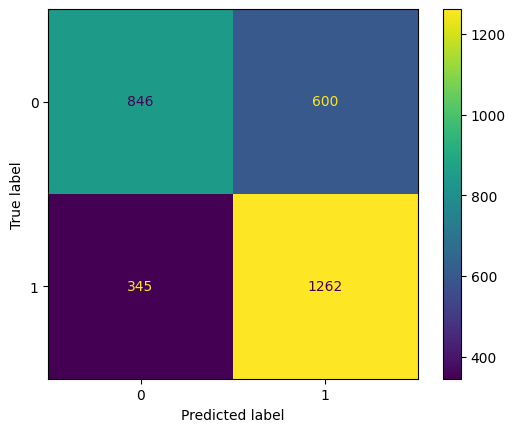

In [47]:
# Generate the matrix's values
cm = confusion_matrix(y_test, rf_preds, labels=rf1.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rf1.classes_,
                             )
disp.plot(values_format='');

The number of false positives is double that of false negative which means the model is more likely to make type 1 error (predicting the customer would tip generously but in fact they won't) and this is quite unsatisfactory for drivers.

**4- Feature importance**

To determine the features with the highest importance in terms of prediction, we'll use the `feature_importances_` attribute of the best estimator object.

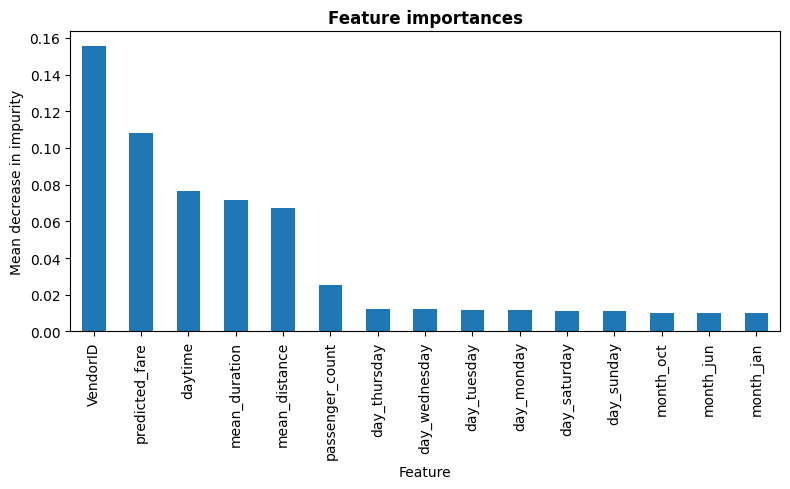

In [50]:
# Generate importance values and sort them in descending order
importances = rf1.best_estimator_.feature_importances_
rf_importances = pd.Series(importances, index=X_test.columns)
rf_importances = rf_importances.sort_values(ascending=False)[:15]

fig, ax = plt.subplots(figsize=(8,5))
rf_importances.plot.bar(ax=ax)
ax.set_title('Feature importances', fontweight= 'bold')
ax.set_xlabel('Feature')
ax.set_ylabel('Mean decrease in impurity')
fig.tight_layout();

**5- Conclusions**

1. The winning model is Random Forest which had a good overall performance with F1 score of 0.72 and an accuracy score of 0.69, the model also has a fair number of true positives and true negatives.


2. The model used the most predictive features (which in the context of random forest have the least impurity) to predict the target variable (whether the customer is a generous tipper or not).

  
3. As a step to improve the model's performance, we can categorize customers based on the tip percent (for eg: cheap, almost generous, generous, very generous) and see if using this new feature can improve the model's performance.
We can also create a new column 'holiday' based on the day column to see is the tip amount is affected by whether the day is a holiday or not. Another feature that can be transformed is the trip distance which can be categorized to short, medium, or long.
  
4. For a more comprehensive view, it would be useful to have some information about the weather conditions, traffic, and holidays all of which can significantly affect the tipping behavior.